# Automatas Celulares:

**Eduardo Carrasco Vidal**

## Creación de un Elementary Celular Automata (Unidimensional):

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# determinamos el estado inicial en forma aleatoria, con valores binarios y rango (tamaño de la grilla)
def inicial_random(tamano):
    estado_inicial_r = [random.randint(0, 1) for _ in range(tamano)]
    return estado_inicial_r

In [2]:
# con esta función determinamos un estado inicial seteado al centro.
def inicial_seteado(tamano):
    # generamos una lista de 0 por el tamaño
    estado_inicial_s = [0] * tamano
    # con esto dejamos el del medio, divide la grilla en 2 y deja el del medio en 1
    estado_inicial_s[tamano // 2] = 1
    return estado_inicial_s

In [3]:
# Convierte un número de regla de Wolfram en un diccionario que mapea vecindarios de 3 células (width=3)
# a estados de células actualizados
def regla_binaria(numero_regla):
    #Consideramos como 8 el numero de digitos
    binario = np.binary_repr(numero_regla, width=8)
    # Generamos división de valores binarios de 3 (del 0 al 7), para asignarle un digito de la regla
    return {np.binary_repr(i, width=3): int(x) for i, x in enumerate(reversed(binario))}

In [4]:
# Aplica la regla anterior a cada generación
def siguiente_generacion(celdas, regla):
    celdas_ext = np.pad(celdas, pad_width=1, mode='wrap')
    vecindarios = [celdas_ext[i:i+3] for i in range(len(celdas))]
    vecindarios_str = [''.join(str(x) for x in vec) for vec in vecindarios]
    return np.array([regla[vec_str] for vec_str in vecindarios_str])

In [5]:
def automata_celular(numero_regla, n_generaciones, tamano, estado_inicial):
    regla = regla_binaria(numero_regla)
    generaciones = [estado_inicial]
    # Itera n_generaciones - 1 veces, ya que la primera generación es el estado inicial.
    for _ in range(n_generaciones - 1):
        #  Genera la siguiente generación del autómata celular utilizando la función 
        # siguiente_generacion con la última generación en la lista generaciones y el diccionario de reglas regla.
        nueva_gen = siguiente_generacion(generaciones[-1], regla)
        ## Añade la nueva generación a la lista de generaciones.
        generaciones.append(nueva_gen)
        #Devuelve una matriz que representa todas las generaciones del autómata celular. 
        #La función np.vstack apila verticalmente las listas en la lista generaciones para formar una matriz.
    return np.vstack(generaciones)

In [6]:
def visualizar_automata(automata):
    plt.imshow(automata, cmap='Greys', interpolation='nearest')
    print(f"  Número de Regla de Wolfram: {numero_regla}")
    print(f"  Número de Generaciones: {n_generaciones}")
    print(f"  Tamaño de la grilla: {tamano}")
    plt.xlabel('Tamaño de la grilla')
    plt.ylabel('Generaciones')
    plt.show()

#### Densidad de 1's:
Qué tan lleno está el autómata (celdas **Activas**)

In [38]:
# Evolución de la densidad de 1, por generación.
def calcular_densidad(automata):
    #sumamos los valores y dividimos por el shape, tamaño grilla
    densidades = np.sum(automata == 1, axis=1) / automata.shape[1]
    return densidades

In [39]:
def graficar_densidad(densidades):
    plt.plot(densidades)
    plt.xlabel('Generación')
    plt.ylabel('Densidad de 1')
    plt.title('Densidad de 1 por generación')
    plt.show()

#### Densidad de 0's:
Qué tan lleno está el autómata (celdas **No Activas**)

In [10]:
# Evolución de la densidad de 1, por generación.
def calcular_densidad_0(automata):
    #sumamos los valores y dividimos por el shape, tamaño grilla
    densidades_0 = np.sum(automata == 0, axis=1) / automata.shape[1]
    return densidades_0

In [11]:
def graficar_densidad_0(densidades_0):
    plt.plot(densidades_0)
    plt.xlabel('Generación')
    plt.ylabel('Densidad de 0')
    plt.title('Densidad de 0 por generación')
    plt.show()

#### Entropía:
Medida de incertidumbre o desorden, puede interpretarse como la incertidumbre en el estado de una celda, dada la distribución de estados en una generación.

In [12]:
from scipy.stats import entropy
def calcular_entropia(automata):
    entropias = []
    for fila in automata:
        # Contamos la cantidad de 1 y 0 en cada fila
        unique, counts = np.unique(fila, return_counts=True)
        frecuencias = dict(zip(unique, counts))
        # Calculamos la probabilidad de 0 y 1 en cada fila
        probs = [frecuencias.get(i, 0) / len(fila) for i in [0, 1]]
        entropias.append(entropy(probs, base=2))
    return np.array(entropias)

In [13]:
def graficar_entropia(entropias):
    plt.plot(entropias)
    plt.xlabel('Generación')
    plt.ylabel('Entropía')
    plt.title('Entropía por generación')
    plt.show()

  Número de Regla de Wolfram: 30
  Número de Generaciones: 100
  Tamaño de la grilla: 200


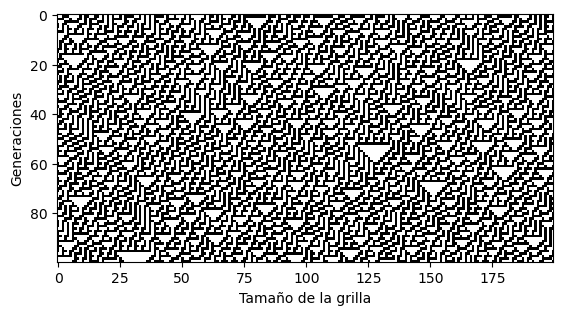

In [11]:
## Definición de condiciones para la simulación:
## se puede seleccionar random o seteado
numero_regla = 30
n_generaciones = 100
tamano = 200
estado_inicial = inicial_random(tamano) #random o seteado

automata = automata_celular(numero_regla, n_generaciones, tamano, estado_inicial)
visualizar_automata(automata)

In [12]:
automata[:,:]

array([[1, 1, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 0, 0, 1],
       ...,
       [1, 1, 1, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [13]:
## Representación binaria de la primera regla
## se puede usar para cualquier representación binaria
np.binary_repr(numero_regla, width=8)

'00011110'

In [14]:
n_filas = len(automata)
n_filas

100